<a href="https://colab.research.google.com/github/jnascimentoc/bigmulheres/blob/master/exploracao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploração de dados

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dados = pd.read_excel('BaseDPEvolucaoMensalCisp.xlsx')

In [ ]:
display(dados.head())

,cisp,mes,ano,mes_ano,aisp,risp,munic,mcirc,regiao,hom_doloso,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,1,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,0,...,NaN,NaN,21,2,0,0,0,0,578,3
1,4,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,3,...,NaN,NaN,15,6,0,1,0,0,441,3
2,5,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,3,...,NaN,NaN,47,2,1,0,0,0,637,3
3,6,1,2003,2003m01,1,1,Rio de Janeiro,3304557,Capital,6,...,NaN,NaN,26,2,1,0,0,0,473,3
4,7,1,2003,2003m01,1,1,Rio de Janeiro,3304557,Capital,4,...,NaN,NaN,10,1,3,0,0,0,147,3


In [ ]:
crimes = [
    'hom_doloso',
    'lesao_corp_morte',
    'latrocinio',
    'cvli',
    'hom_por_interv_policial',
    'letalidade_violenta',
    'tentat_hom',
    'lesao_corp_dolosa',
    'estupro',
    'hom_culposo',
    'lesao_corp_culposa',
    'roubo_transeunte',
    'roubo_celular',
    'roubo_em_coletivo',
    'roubo_rua',
    'roubo_veiculo',
    'roubo_carga',
    'roubo_comercio',
    'roubo_residencia',
    'roubo_banco',
    'roubo_cx_eletronico',
    'roubo_conducao_saque',
    'roubo_apos_saque',
    'roubo_bicicleta',
    'outros_roubos',
    'total_roubos',
    'furto_veiculos',
    'furto_transeunte',
    'furto_coletivo',
    'furto_celular',
    'furto_bicicleta',
    'outros_furtos',
    'total_furtos',
    'sequestro',
    'extorsao',
    'sequestro_relampago',
    'estelionato',
    'apreensao_drogas',
    'posse_drogas',
    'trafico_drogas',
    'apreensao_drogas_sem_autor',
    'recuperacao_veiculos',
    'apf',
    'aaapai',
    'cmp',
    'cmba',
    'ameaca',
    'pessoas_desaparecidas',
    'encontro_cadaver',
    'encontro_ossada',
    'pol_militares_mortos_serv',
    'pol_civis_mortos_serv'
]

In [ ]:
soma_ocorrencias = df[crimes].sum().sum()
print("A soma total de ocorrências é:", soma_ocorrencias)

# Calcular a soma de cada coluna separadamente e armazenar em um dicionário
soma_individual_crimes = {coluna: df[coluna].sum() for coluna in crimes}

# Exibir a soma de cada coluna
for coluna, soma in soma_individual_crimes.items():
    print(f"O total de {coluna} é: {soma}")

####################################################

for crime in crimes:
    media = df[crime].mean()
    mediana = df[crime].median()
    descricao = df[crime].describe()
    distancia=(media-mediana)/mediana*100

    print(f"--- Estatísticas para '{crime}' ---")
    print(f"Média: {media}")
    print(f"Mediana: {mediana}")
    print(f"Descrição:\n{descricao}\n")
    print(f'Distância entre média e mediana: {distancia:.2f}%')

####################################################

for crime in crimes:
    quartil_1 = df[crime].quantile(0.25)
    quartil_2 = df[crime].quantile(0.5)  # Este é o mesmo valor da mediana
    quartil_3 = df[crime].quantile(0.75)

    print(f"--- Estatísticas para '{crime}' ---")
    print(f"Média: {media}")
    print(f"Mediana: {mediana}")
    print(f"Primeiro Quartil (Q1 - 25%): {quartil_1}")
    print(f"Segundo Quartil (Q2 - 50%, Mediana): {quartil_2}")
    print(f"Terceiro Quartil (Q3 - 75%): {quartil_3}")
    print(f"Descrição:\n{descricao}\n")

    if quartil_1 <= media <= quartil_3:
        print("A média está DENTRO do intervalo interquartil, o que sugere confiabilidade.")
    else:
        print("A média está FORA do intervalo interquartil, o que sugere MENOS confiabilidade.")

    iqr=quartil_3-quartil_1
    limite_superior=quartil_3+(1.5*iqr)
    limite_inferior=quartil_1-(1.5*iqr)
    print(f'Limite superior: {limite_superior}')
    print(f'Limite inferior: {limite_inferior}')

####################################################

for crime in crimes:
    valor_maximo = df[crime].max()
    valor_minimo = df[crime].min()
    amplitude_total = valor_maximo - valor_minimo

    print(f"--- Medidas de Dispersão para '{crime}' ---")
    print(f"Menor Valor: {valor_minimo}")
    print(f"Maior Valor: {valor_maximo}")
    print(f"Amplitude: {amplitude_total}\n")


####################################################

In [ ]:
top_10_crimes = sorted(soma_individual_crimes.items(), key=lambda x: x[1], reverse=True)[:10]

# Exibindo os 10 crimes com mais ocorrências
print("Os 10 crimes com mais ocorrências são:")
for crime, soma in top_10_crimes:
    print(f"{crime}: {soma} ocorrências")



Os 10 crimes com mais ocorrências são:
total_furtos: 3379439 ocorrências
total_roubos: 3033838 ocorrências
outros_furtos: 1902104 ocorrências
roubo_rua: 1702301 ocorrências
lesao_corp_dolosa: 1570177 ocorrências
ameaca: 1447059 ocorrências
roubo_transeunte: 1222660 ocorrências
estelionato: 935090 ocorrências
lesao_corp_culposa: 760546 ocorrências
roubo_veiculo: 676266 ocorrências


Porcentagens dos 10 principais tipos de crime em relação ao total:
total_furtos          20.321976
total_roubos          18.243733
outros_furtos         11.438145
roubo_rua             10.236646
lesao_corp_dolosa      9.442129
ameaca                 8.701769
roubo_transeunte       7.352365
estelionato            5.623086
lesao_corp_culposa     4.573480
roubo_veiculo          4.066670
dtype: float64


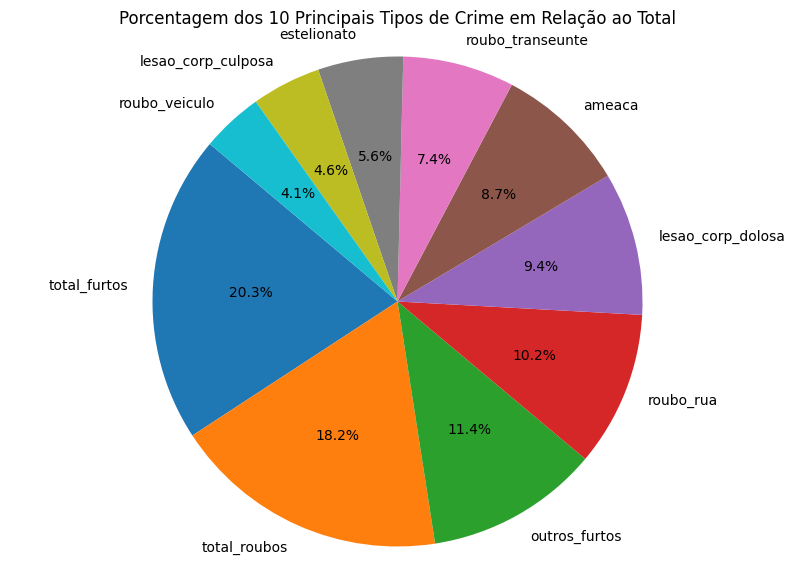

In [ ]:
import matplotlib.pyplot as plt

# Configuração do painel
soma_individual_crimes = df[crimes].sum()

# Selecionar os 10 principais crimes
top_10_crimes = soma_individual_crimes.nlargest(10)

# Calcular o total de ocorrências dos 10 principais crimes
soma_ocorrencias_top_10 = top_10_crimes.sum()

# Calcular a porcentagem de cada tipo de crime em relação ao total dos 10 principais
porcentagens_top_10 = (top_10_crimes / soma_ocorrencias_top_10) * 100

# Exibir as porcentagens
print("Porcentagens dos 10 principais tipos de crime em relação ao total:")
print(porcentagens_top_10)

# Visualizar os resultados com um gráfico de pizza
plt.figure(figsize=(10, 7))
plt.pie(porcentagens_top_10, labels=porcentagens_top_10.index, autopct='%1.1f%%', startangle=140)
plt.title('Porcentagem dos 10 Principais Tipos de Crime em Relação ao Total')
plt.axis('equal')  # Para garantir que o gráfico de pizza seja um círculo
plt.show()

Porcentagens de cada tipo de crime em relação ao total:
hom_doloso                     0.473059
lesao_corp_morte               0.004295
latrocinio                     0.015437
cvli                           0.492791
hom_por_interv_policial        0.099079
letalidade_violenta            0.591871
tentat_hom                     0.451467
lesao_corp_dolosa              7.054469
estupro                        0.455007
hom_culposo                    0.220052
lesao_corp_culposa             3.416970
roubo_transeunte               5.493150
roubo_celular                  1.264113
roubo_em_coletivo              0.890812
roubo_rua                      7.648074
roubo_veiculo                  3.038318
roubo_carga                    0.496354
roubo_comercio                 0.500505
roubo_residencia               0.131279
roubo_banco                    0.002458
roubo_cx_eletronico            0.004587
roubo_conducao_saque           0.011564
roubo_apos_saque               0.144254
roubo_bicicleta         

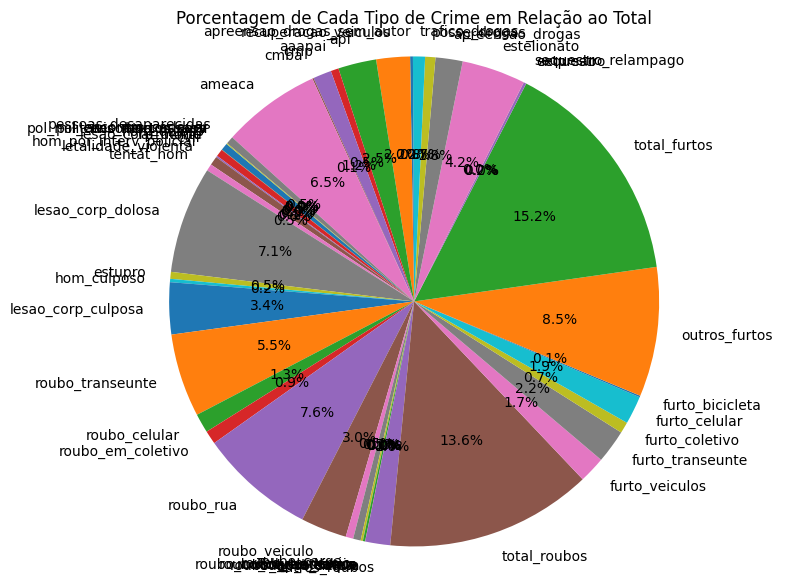

In [ ]:
import seaborn as sns
# Supondo que você já tenha um DataFrame chamado df com os dados de crimes
# E que as colunas representem diferentes tipos de crimes

# Calcular o total de ocorrências de crimes
soma_ocorrencias = df[crimes].sum().sum()

# Calcular a porcentagem de cada tipo de crime em relação ao total
porcentagens_crimes = (df[crimes].sum() / soma_ocorrencias) * 100

# Exibir as porcentagens
print("Porcentagens de cada tipo de crime em relação ao total:")
print(porcentagens_crimes)

# Visualizar os resultados com um gráfico de pizza
plt.figure(figsize=(10, 7))
plt.pie(porcentagens_crimes, labels=porcentagens_crimes.index, autopct='%1.1f%%', startangle=140)
plt.title('Porcentagem de Cada Tipo de Crime em Relação ao Total')
plt.axis('equal')  # Para garantir que o gráfico de pizza seja um círculo
plt.show()